## Importing the Dataset

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving multiTimeline.csv to multiTimeline.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
plt.rcParams.update({'figure.figsize': (12, 6), 'figure.dpi': 120})
df=pd.read_csv(io.BytesIO(uploaded["multiTimeline.csv"]),index_col='Month',parse_dates=True)
df.head()

,NBA,Premier League,LaLiga,NFL
Month,,,,
2004-01-01,20,6,2,25
2004-02-01,23,6,2,16
2004-03-01,19,6,3,11
2004-04-01,23,6,2,15
2004-05-01,26,5,2,7


In [ ]:
print(df.describe())
df_copy=df

              NBA  Premier League      LaLiga         NFL
count  208.000000      208.000000  208.000000  208.000000
mean    29.942308       18.884615    9.557692   28.274038
std     17.071222       16.023417    8.678728   21.737052
min      7.000000        3.000000    1.000000    6.000000
25%     17.000000        7.000000    3.000000   10.750000
50%     27.000000       14.000000    6.000000   18.000000
75%     38.000000       26.000000   15.000000   43.000000
max     86.000000       85.000000   37.000000   87.000000


In [ ]:
# time series - statsmodels
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   # double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing


## Exploratory Data Analysis

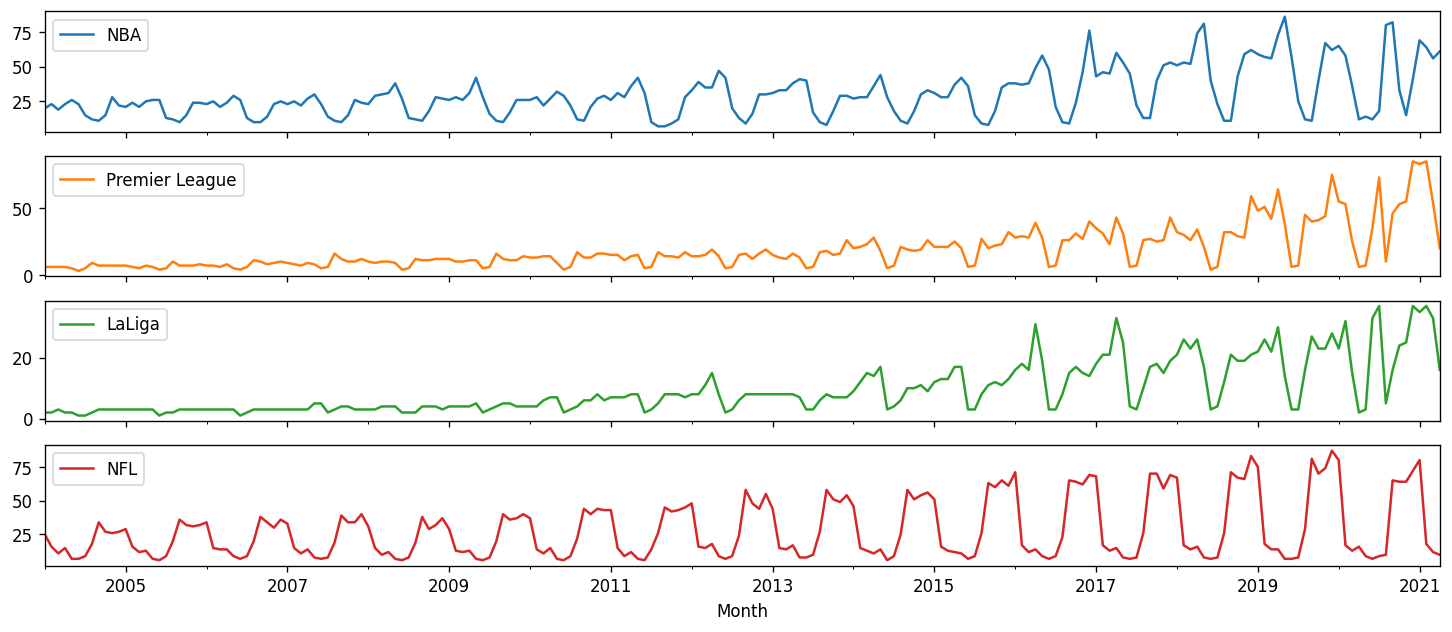

In [ ]:

df.plot(subplots=True, figsize=(15,6))
plt.show()

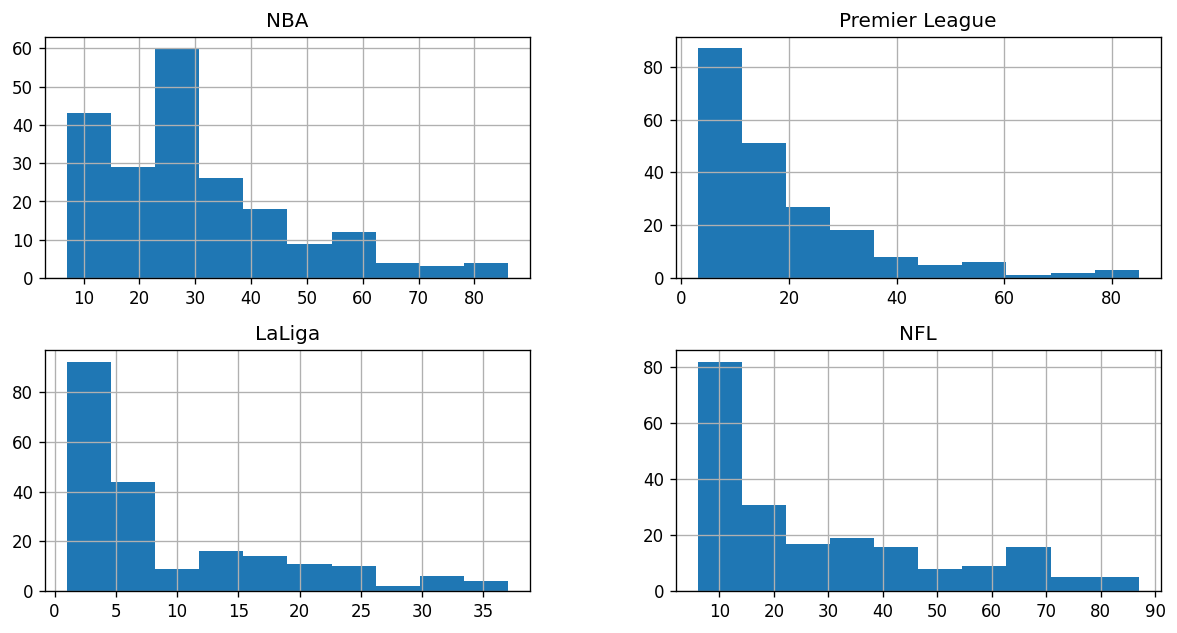

In [ ]:
# plotting the original data
df.hist( )
plt.show()

In [ ]:
!pip install calplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for calplot: filename=calplot-0.1.7.5-py3-none-any.whl size=8115 sha256=35036ec0e67db0cde5d082f86be8c53ba45eb36f6fde50cc1399e1d0d7e9ceb6
  Stored in directory: /root/.cache/pip/wheels/77/75/32/a518a4a1421776a93e1ede33cb8dac474095bf31fed7e4e22c
Successfully built calplot


In [ ]:
import calplot
calplot.calplot(df['LaLiga'],linewidth = 2.3,colorbar=False,suptitle='Yearwise distribution of La Liga')

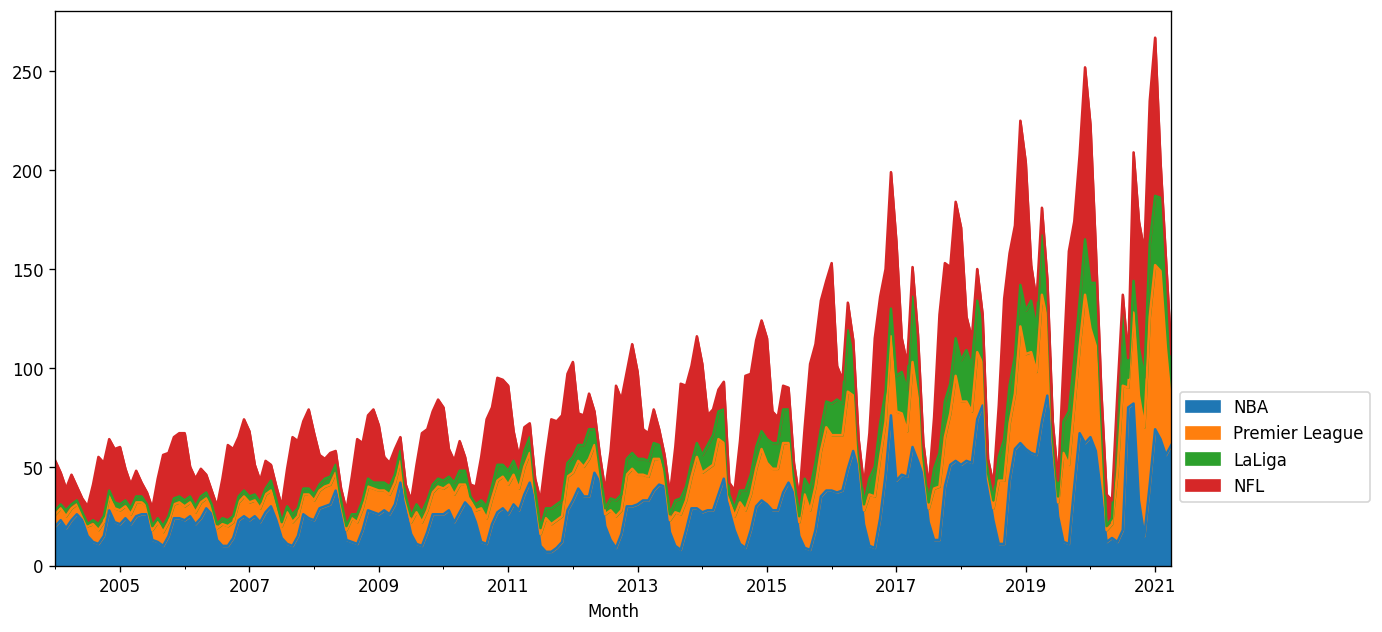

In [ ]:

ax=df.plot.area()
ax.autoscale(axis='x',tight=True)
ax.legend(loc=3,bbox_to_anchor=(1.0,0.1))

In [ ]:
df.columns

Index(['NBA', 'Premier League', 'LaLiga', 'NFL'], dtype='object')

## Augmented Dicky Fuller test for stationarity

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Loop through each league column
for league in ['NBA', 'Premier League', 'LaLiga', 'NFL']:
    # Extract the time series data for the specific league
    time_series_data = df[league]

    # Perform the Augmented Dickey-Fuller test
    result = adfuller(time_series_data)

    # Print the results
    print(f'ADF Statistic for {league}: {result[0]}')
    print(f'p-value for {league}: {result[1]}')
    print(f'Critical Values for {league}: {result[4]}')
    print('\n')



ADF Statistic for NBA: -0.34362809963026747
p-value for NBA: 0.9190939728083071
Critical Values for NBA: {'1%': -3.4648754262570978, '5%': -2.876714157488788, '10%': -2.574858699001736}


ADF Statistic for Premier League: 2.2360863369379813
p-value for Premier League: 0.9989109078086597
Critical Values for Premier League: {'1%': -3.464161278384219, '5%': -2.876401960790147, '10%': -2.5746921001665974}


ADF Statistic for LaLiga: 2.5475320666430417
p-value for LaLiga: 0.999063592307292
Critical Values for LaLiga: {'1%': -3.4645146202692527, '5%': -2.8765564361715534, '10%': -2.5747745328940375}


ADF Statistic for NFL: -1.1030109758435465
p-value for NFL: 0.7138696702689333
Critical Values for NFL: {'1%': -3.4646940755442612, '5%': -2.8766348847254934, '10%': -2.5748163958763994}




# Splitting TRAIN and TEST

In [ ]:

##Splitting tr=into train and test
train= df[0:150]
test=df[150:]
print(train)

            NBA  Premier League  LaLiga  NFL
Month                                       
2004-01-01   20               6       2   25
2004-02-01   23               6       2   16
2004-03-01   19               6       3   11
2004-04-01   23               6       2   15
2004-05-01   26               5       2    7
...         ...             ...     ...  ...
2016-02-01   37              29      18   17
2016-03-01   38              28      16   12
2016-04-01   49              39      31   14
2016-05-01   58              28      19    9
2016-06-01   48               6       3    7

[150 rows x 4 columns]


In [ ]:
print(test)

            NBA  Premier League  LaLiga  NFL
Month                                       
2016-07-01   21               7       3    9
2016-08-01   10              26       8   23
2016-09-01    9              26      15   65
2016-10-01   24              31      17   64
2016-11-01   46              27      15   62
2016-12-01   76              40      14   69
2017-01-01   43              35      18   68
2017-02-01   46              31      21   17
2017-03-01   45              23      21   13
2017-04-01   60              43      33   15
2017-05-01   53              31      25    8
2017-06-01   45               6       4    7
2017-07-01   22               7       3    8
2017-08-01   13              26      10   26
2017-09-01   13              27      17   70
2017-10-01   40              25      18   70
2017-11-01   51              26      15   59
2017-12-01   53              43      19   69
2018-01-01   51              32      21   67
2018-02-01   53              30      26   17
2018-03-01

# NBA

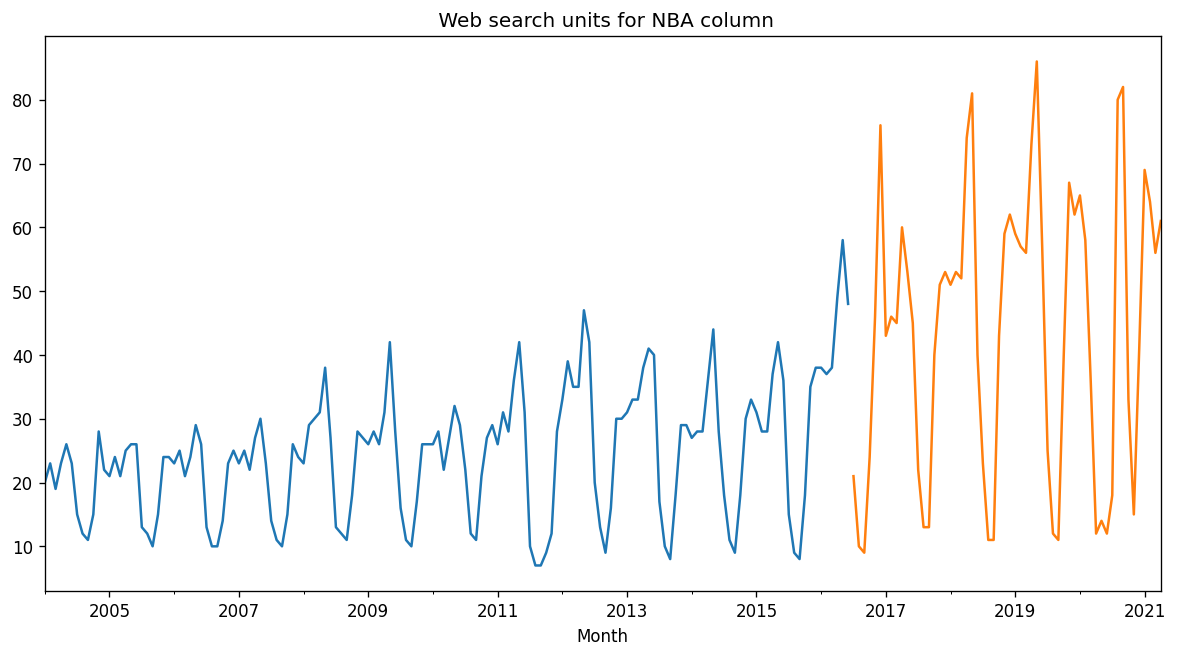

In [ ]:
train.NBA.plot(title=" Web Search units for NBA column")
test.NBA.plot(title=" Web search units for NBA column")
plt.show()

### Naive Forecast

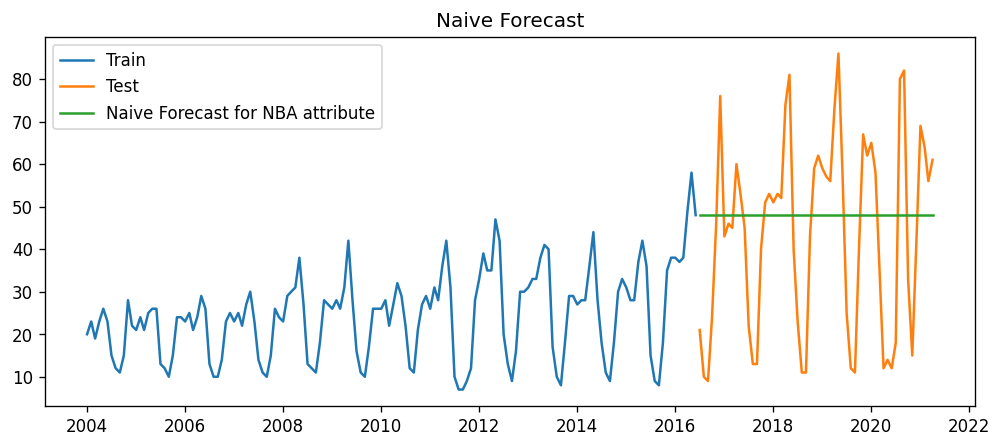

In [ ]:
dd =np.asarray(train.NBA)
y_hat = test.copy()
y_hat['naive']= dd[len(dd)-1]
plt.figure(figsize=(10,4))
plt.plot(train.index,train['NBA'],label='Train')
plt.plot(test.index,test['NBA'],label='Test')
plt.plot(y_hat.index,y_hat['naive'],label='Naive Forecast for NBA attribute')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [ ]:
## Printing RMSE for naive forecast
from sklearn.metrics import mean_squared_error
from math import sqrt
rms_naive = sqrt(mean_squared_error(test.NBA, y_hat.naive))
print(rms_naive)

22.73042924788495


### Simple Average
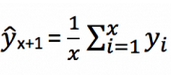

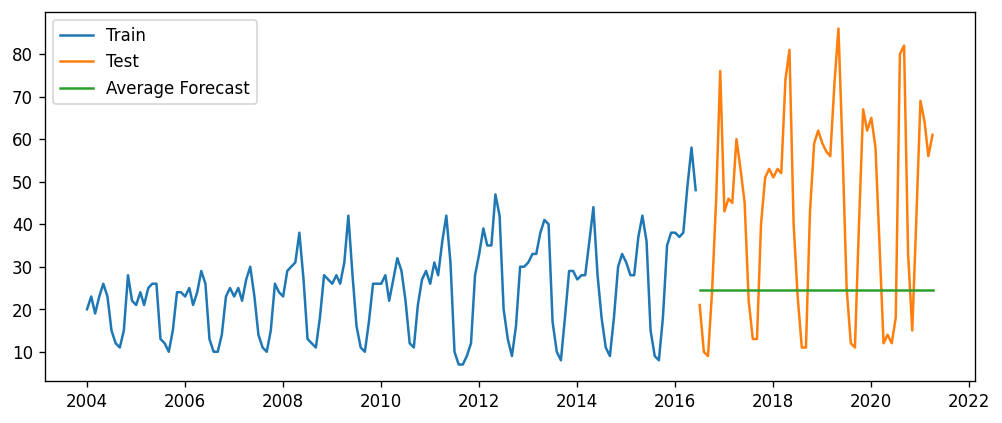

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['NBA'].mean()
plt.figure(figsize=(10,4))
plt.plot(train['NBA'], label='Train')
plt.plot(test['NBA'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
rms_avg = sqrt(mean_squared_error(test.NBA, y_hat_avg.avg_forecast))
print(rms_avg)

29.657928223552805


### Trends of NBA league

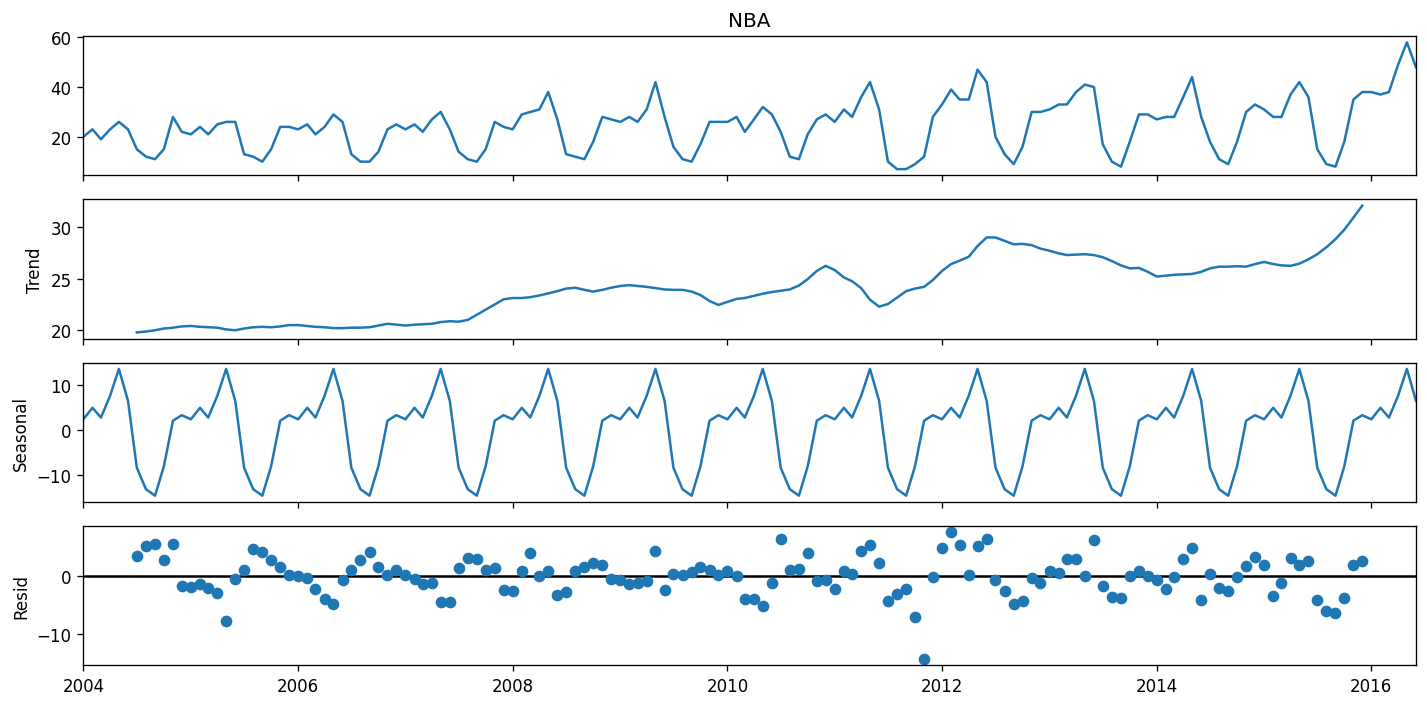

In [ ]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.NBA).plot()
result = sm.tsa.stattools.adfuller(train.NBA)
plt.show()

### Holt's Linear Trend Model



<ipython-input-33-35fa8761dabd>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(np.asarray(train['NBA'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


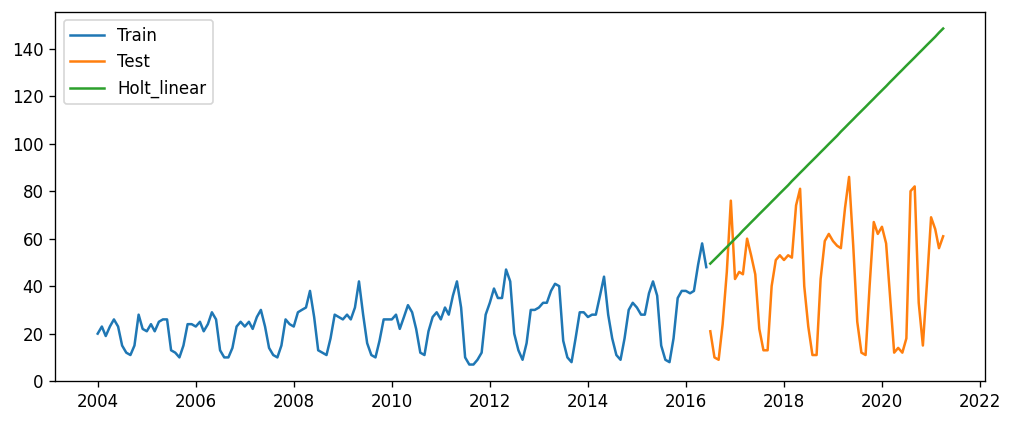

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['NBA'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(10,4))
plt.plot(train['NBA'], label='Train')
plt.plot(test['NBA'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()



In [ ]:
rms_lin = sqrt(mean_squared_error(test.NBA, y_hat_avg.Holt_linear))
print(rms_lin)

64.52006706165623


### Holt-Winters Exponential Model

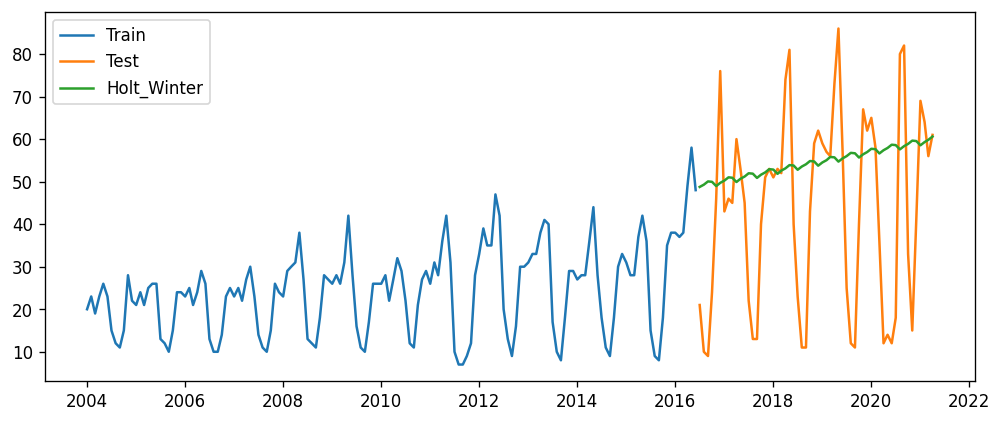

In [ ]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['NBA']) ,seasonal_periods=5 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(10,4))
plt.plot( train['NBA'], label='Train')
plt.plot(test['NBA'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [ ]:
rms_exp = sqrt(mean_squared_error(test.NBA, y_hat_avg.Holt_Winter))
print(rms_exp)

24.567421752760804


### SARIMA MODEL

## Making the series stationary for SARIMA

In [ ]:

# Apply regular differencing
df_diff = df.copy()
df_diff.iloc[:, 0:] = df.iloc[:, 0:].diff().dropna()

# Apply seasonal differencing
seasonal_lag = 12  # Assuming a yearly seasonality, adjust as needed
df_diff.iloc[:, 0:] = df_diff.iloc[:, 0:] - df_diff.iloc[:, 0:].shift(seasonal_lag).dropna()

# Splitting into train and test sets
train_SAR = df_diff[0:150]
test_SAR = df_diff[150:]


## Checking stationarity again

In [ ]:
# Loop through each league column
for league in ['NBA', 'Premier League', 'LaLiga', 'NFL']:
    # Extract the time series data for the specific league
    time_series_data = df_diff[league]
    time_series_data = time_series_data.dropna()

    # Perform the Augmented Dickey-Fuller test
    result1 = adfuller(time_series_data)


    # Print the results
    print(f'ADF Statistic for {league}: {result1[0]}')
    print(f'p-value for {league}: {result1[1]}')
    print(f'Critical Values for {league}: {result1[4]}')
    print('\n')

ADF Statistic for NBA: -6.302829435434779
p-value for NBA: 3.379235335331729e-08
Critical Values for NBA: {'1%': -3.466598080268425, '5%': -2.8774669520682674, '10%': -2.5752604356654425}


ADF Statistic for Premier League: -6.579877535379483
p-value for Premier League: 7.561100888459164e-09
Critical Values for Premier League: {'1%': -3.4674201432469816, '5%': -2.877826051844538, '10%': -2.575452082332012}


ADF Statistic for LaLiga: -4.761754401782969
p-value for LaLiga: 6.432793835051762e-05
Critical Values for LaLiga: {'1%': -3.4674201432469816, '5%': -2.877826051844538, '10%': -2.575452082332012}


ADF Statistic for NFL: -9.098847940281594
p-value for NFL: 3.651938932468995e-15
Critical Values for NFL: {'1%': -3.465620397124192, '5%': -2.8770397560752436, '10%': -2.5750324547306476}




In [ ]:
pip install pmdarima

<ipython-input-40-ef5b67c1fef0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_SAR['NBA'] = train_SAR['NBA'].fillna(train_SAR['NBA'].mean())  # Replace NaNs with mean


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=4.94 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=872.193, Time=0.14 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=837.283, Time=0.56 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=817.053, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=870.244, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=858.587, Time=0.35 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=819.006, Time=1.02 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=818.990, Time=1.05 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=832.181, Time=0.66 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=820.636, Time=2.11 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=823.025, Time=0.44 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.78 sec
 ARIMA(0,0,2)(0,0,1)[12] intercept   : AIC=inf, Time=3.38 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=820.651, Time=0.48 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=in

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


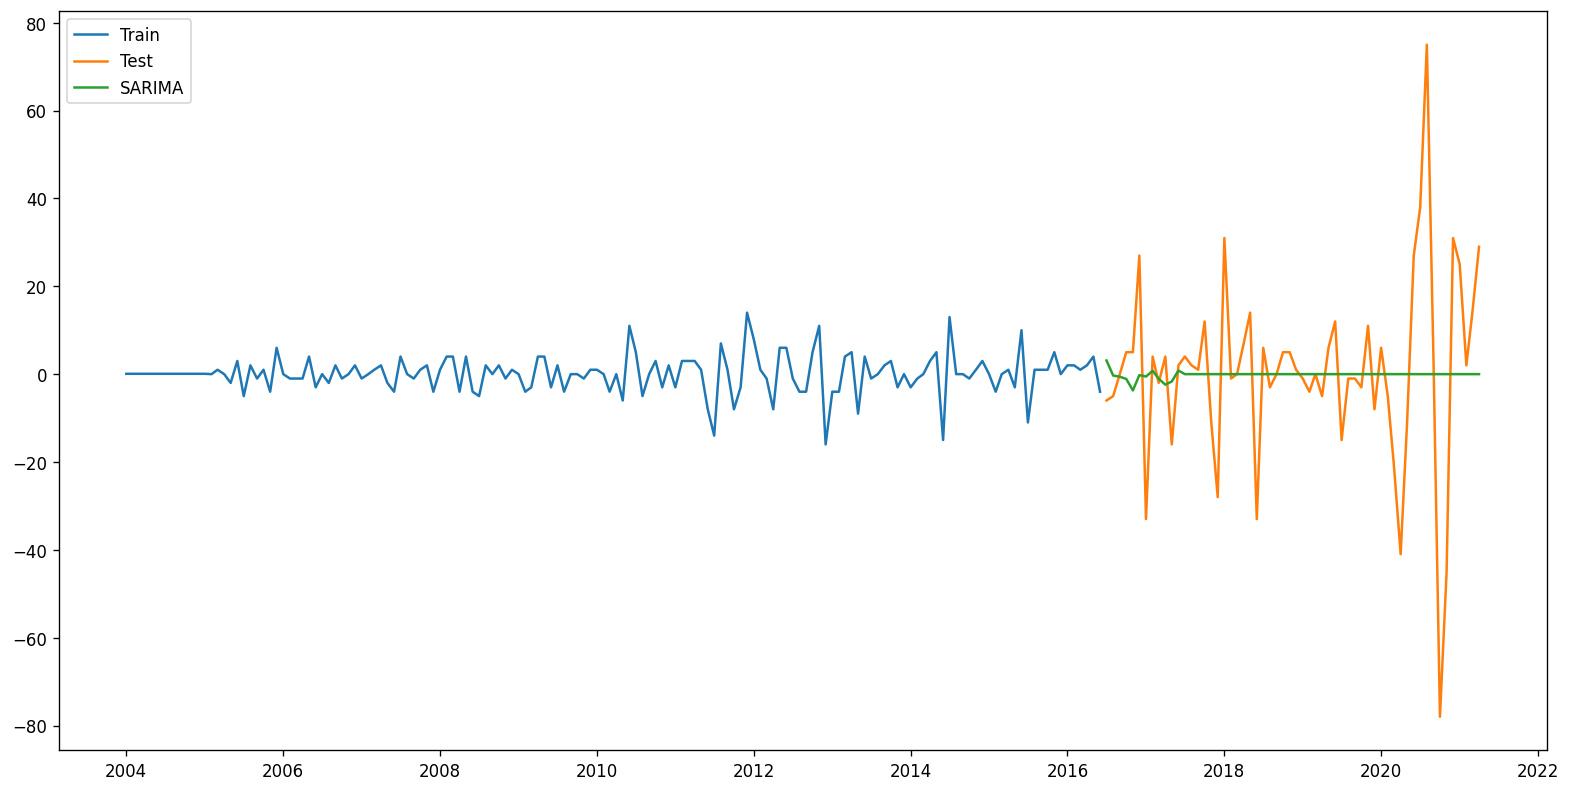

In [ ]:
from pmdarima import auto_arima

# Assuming 'train.NBA' is your time series data
# Fit SARIMA model using auto_arima
y_hat_sarima=test_SAR.copy()
train_SAR['NBA'] = train_SAR['NBA'].fillna(train_SAR['NBA'].mean())  # Replace NaNs with mean
auto_model = auto_arima(train_SAR.NBA, seasonal=True, m=12, stepwise=True, trace=True, suppress_warnings=True, error_action="ignore", max_order=None, seasonal_test='ocsb', out_of_sample_size=int(len(train_SAR)*0.2))

# Get the best SARIMA model
best_model = auto_model.get_params()
print("Best SARIMA model:", best_model)

# Fit the best SARIMA model
best_fit = sm.tsa.statespace.SARIMAX(train_SAR.NBA, order=(best_model['order']), seasonal_order=(best_model['seasonal_order'])).fit()

# Generate forecasts
y_hat_sarima['SARIMA'] = best_fit.predict(start="2016-06-1", end="2021-04-1", dynamic=True)

# Plot the results
plt.figure(figsize=(16,8))
plt.plot(train_SAR['NBA'], label='Train')
plt.plot(test_SAR['NBA'], label='Test')
plt.plot(y_hat_sarima['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()


In [ ]:
rms_sarima = sqrt(mean_squared_error(test_SAR.NBA, y_hat_sarima.SARIMA))
print(rms_sarima)

21.664788682762595


In [ ]:
from tabulate import tabulate
from tabulate import tabulate_formats
tbl=tabulate([["Naive Method ",rms_naive],["SimpleAvg",rms_avg],["Holts_linear",rms_lin],["Holts_Exponentiation",rms_exp],["SARIMA",rms_sarima]],headers=["Method","RMSE"],tablefmt="rst")
print(tbl)

====================  =======
Method                   RMSE
====================  =======
Naive Method          22.7304
SimpleAvg             29.6579
Holts_linear          64.5201
Holts_Exponentiation  24.5674
SARIMA                21.6648
====================  =======


###LA LIGA

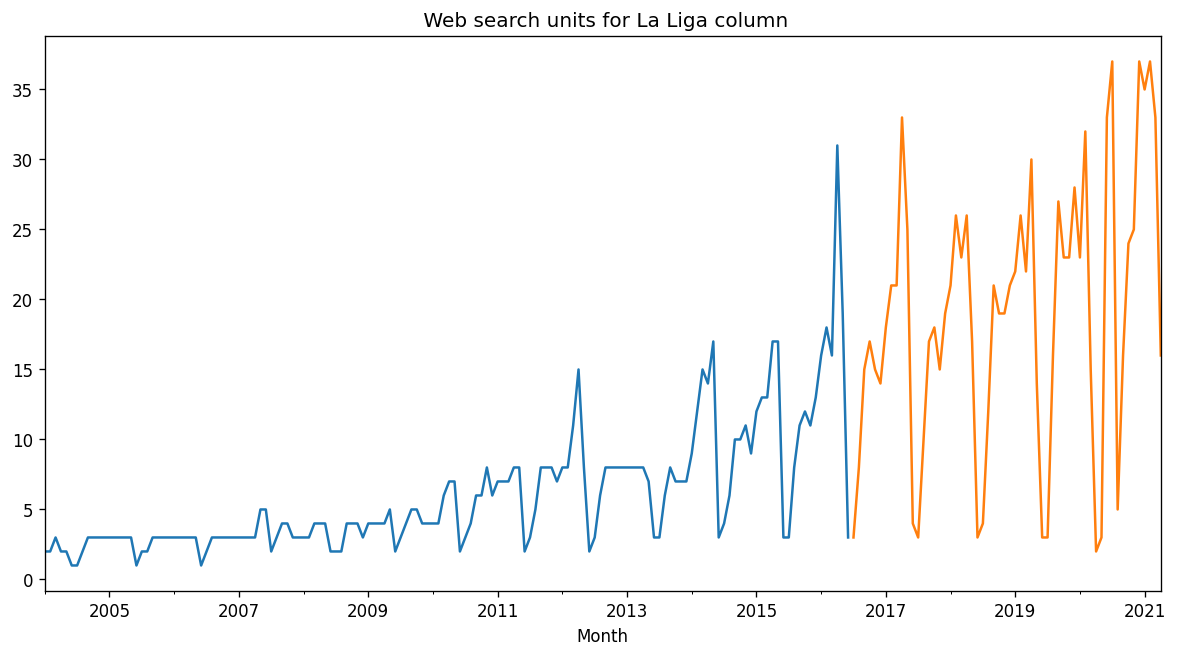

In [ ]:
train.LaLiga.plot(title=" Web Search units for La Liga column")
test.LaLiga.plot(title=" Web search units for La Liga column")
plt.show()

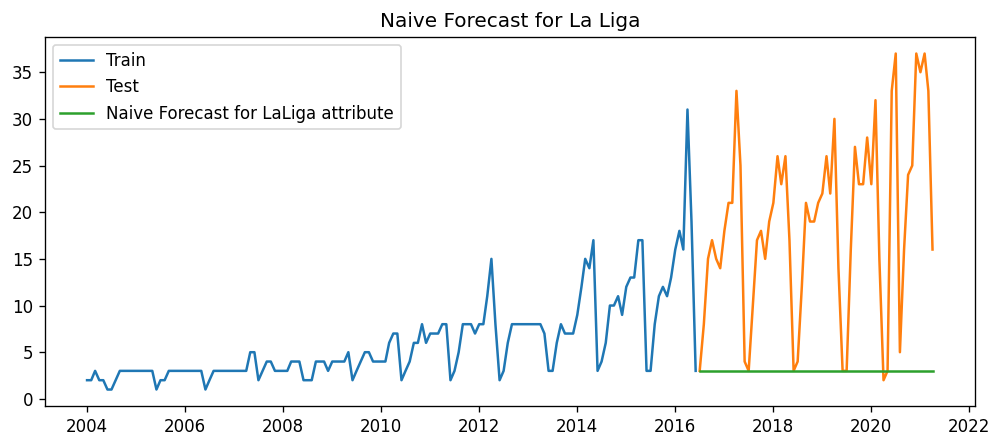

In [ ]:
# NAIVE FORECAST

dd =np.asarray(train.LaLiga)
y_hat = test.copy()
y_hat['naive']= dd[len(dd)-1]
plt.figure(figsize=(10,4))
plt.plot(train.index,train['LaLiga'],label='Train')
plt.plot(test.index,test['LaLiga'],label='Test')
plt.plot(y_hat.index,y_hat['naive'],label='Naive Forecast for LaLiga attribute')
plt.legend(loc='best')
plt.title("Naive Forecast for La Liga")
plt.show()

In [ ]:
## Printing RMSE for naive forecast
from sklearn.metrics import mean_squared_error
from math import sqrt
rms_naive = sqrt(mean_squared_error(test.LaLiga, y_hat.naive))
print(rms_naive)

18.65937870865757


###Simple Average

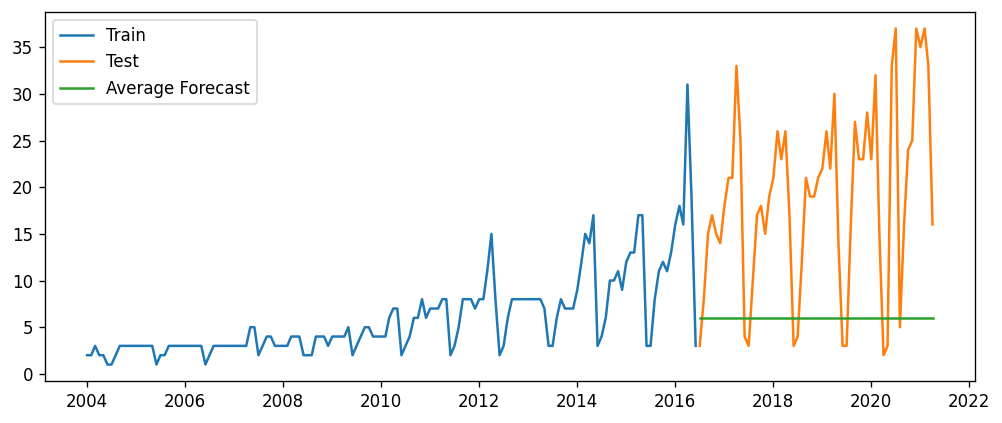

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['LaLiga'].mean()
plt.figure(figsize=(10,4))
plt.plot(train['LaLiga'], label='Train')
plt.plot(test['LaLiga'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
rms_avg_laliga = sqrt(mean_squared_error(test.LaLiga, y_hat_avg.avg_forecast))
print(rms_avg_laliga)

16.22697720686236


###Trends of La Liga

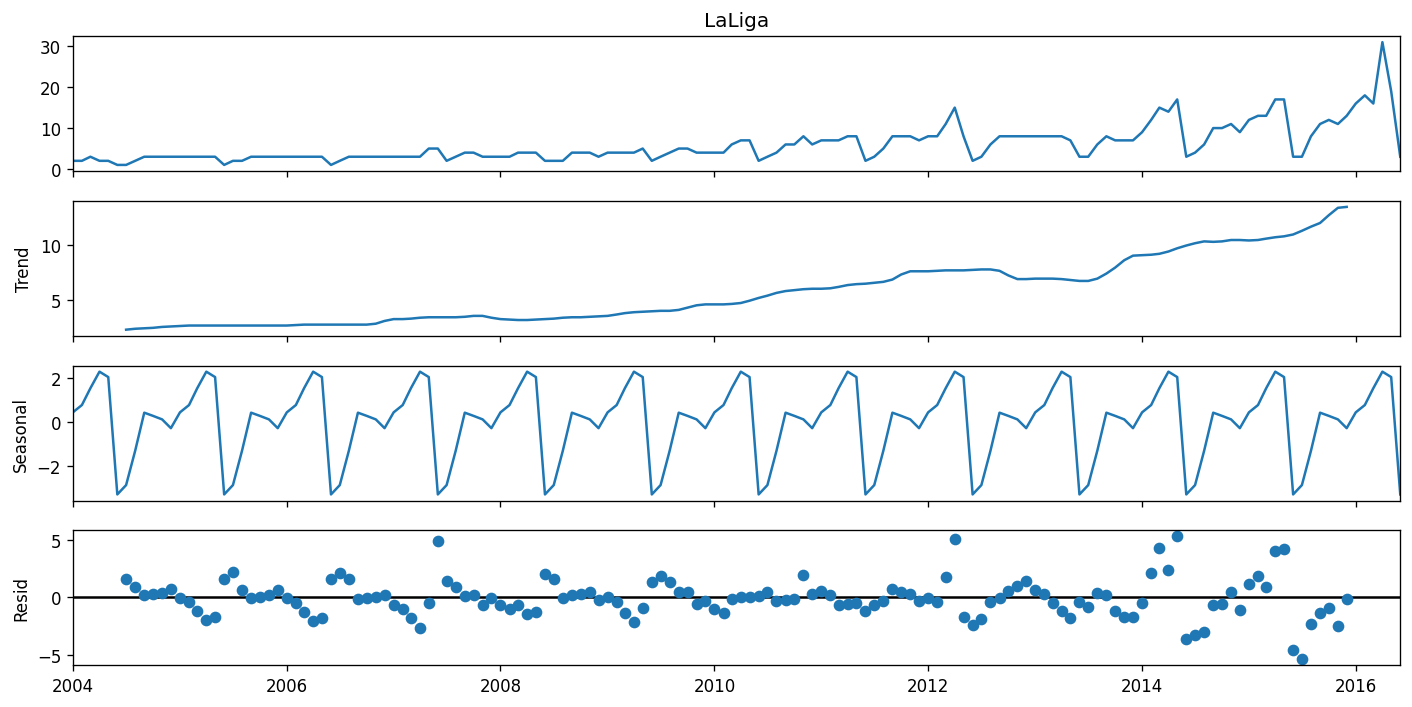

In [ ]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.LaLiga).plot()
result = sm.tsa.stattools.adfuller(train.LaLiga)
plt.show()

###Holt's Linear Trend Model

<ipython-input-49-a9b86340ed63>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(np.asarray(train['LaLiga'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


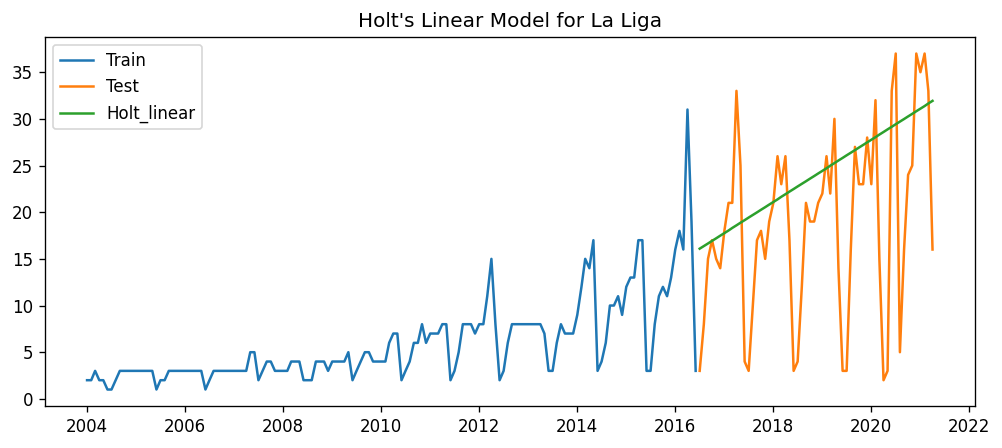

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['LaLiga'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(10,4))
plt.plot(train['LaLiga'], label='Train')
plt.plot(test['LaLiga'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.title("Holt's Linear Model for La Liga")
plt.show()

In [ ]:
rms_lin_laliga = sqrt(mean_squared_error(test.NBA, y_hat_avg.Holt_linear))
print(rms_lin_laliga)

29.79470551291404


###Holt's Winter Exponential Method

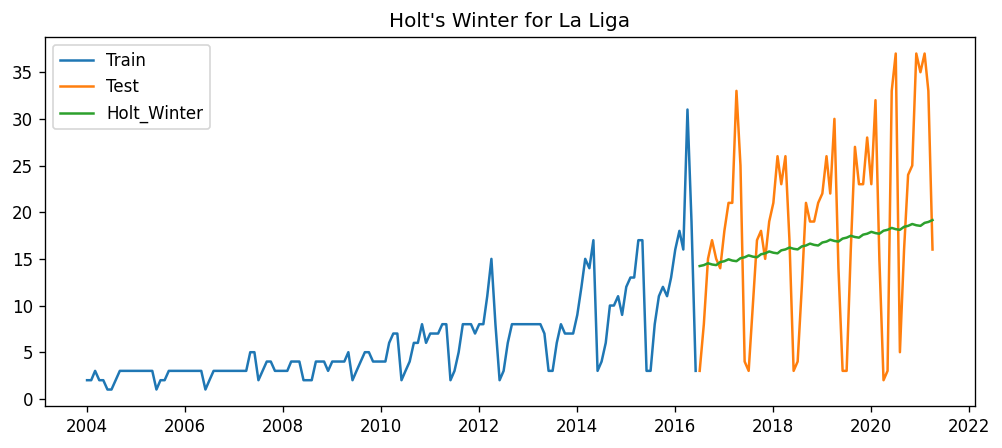

In [ ]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['LaLiga']) ,seasonal_periods=5 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(10,4))
plt.plot( train['LaLiga'], label='Train')
plt.plot(test['LaLiga'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.title("Holt's Winter for La Liga")
plt.show()

In [ ]:
rms_exp_laliga = sqrt(mean_squared_error(test.LaLiga, y_hat_avg.Holt_Winter))
print(rms_exp_laliga)

9.612141479337136


###SARIMA MODEL


<ipython-input-53-4e4760fe49a8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_SAR['LaLiga'] = train_SAR['LaLiga'].fillna(train_SAR['LaLiga'].mean())  # Replace NaNs with mean


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=738.613, Time=2.67 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=670.092, Time=0.14 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=648.278, Time=0.45 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=629.082, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=668.094, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=638.188, Time=0.16 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=623.437, Time=0.38 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=625.554, Time=0.24 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=622.330, Time=0.95 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=625.944, Time=0.55 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=2.38 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=622.463, Time=0.92 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=2.25 sec
 ARIMA(0,0,2)(2,0,1)[12] intercept   : AIC=in

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


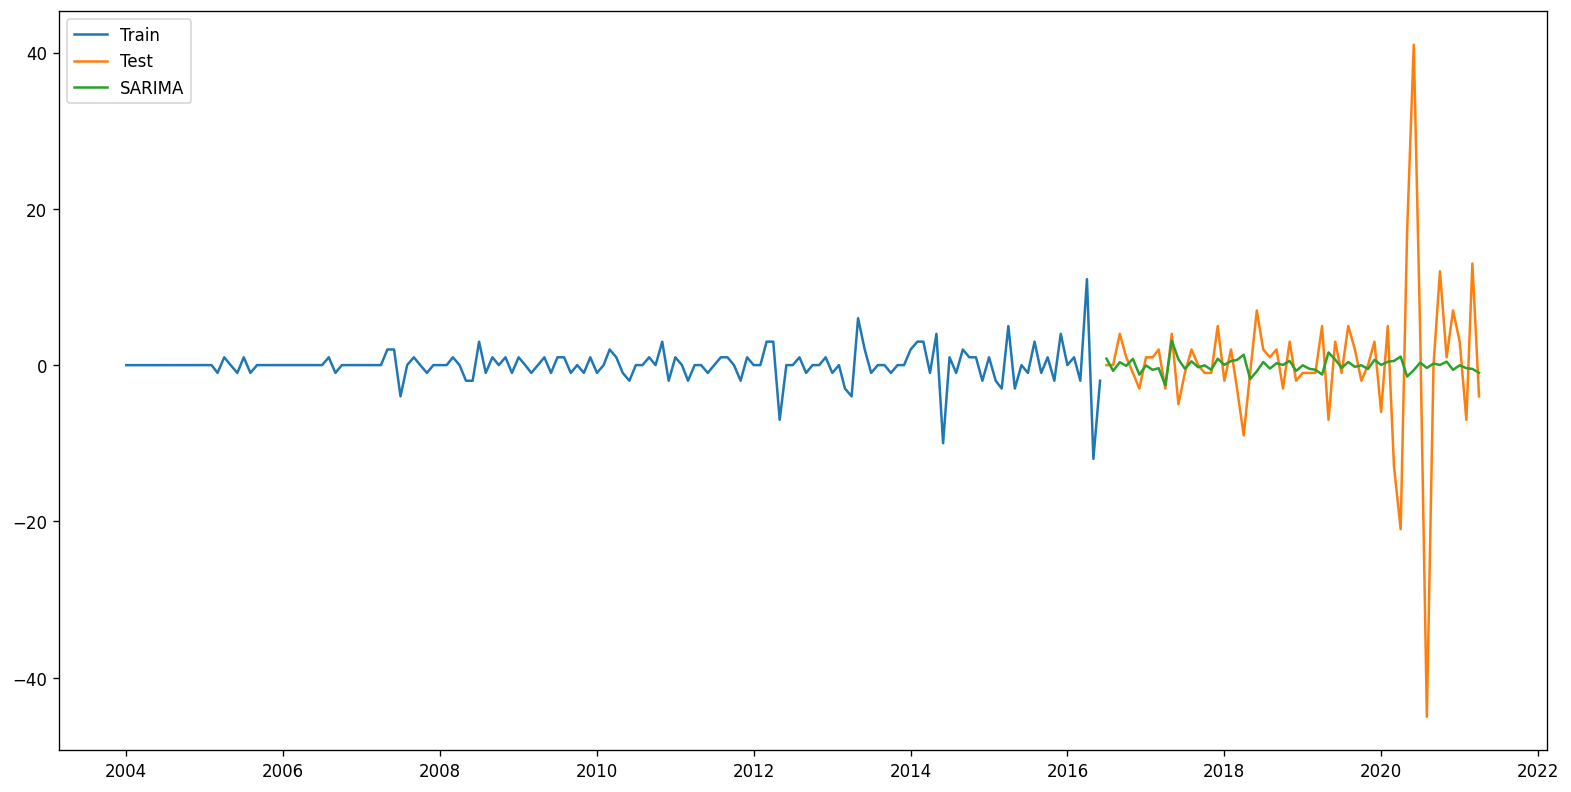

In [ ]:
from pmdarima import auto_arima

# Fit SARIMA model using auto_arima
y_hat_LaLiga=test_SAR.copy()
train_SAR['LaLiga'] = train_SAR['LaLiga'].fillna(train_SAR['LaLiga'].mean())  # Replace NaNs with mean
auto_model = auto_arima(train_SAR.LaLiga, seasonal=True, m=12, stepwise=True, trace=True, suppress_warnings=True, error_action="ignore", max_order=None, seasonal_test='ocsb', out_of_sample_size=int(len(train_SAR)*0.2))

# Get the best SARIMA model
best_model = auto_model.get_params()
print("Best SARIMA model:", best_model)

# Fit the best SARIMA model
best_fit = sm.tsa.statespace.SARIMAX(train_SAR.LaLiga, order=(best_model['order']), seasonal_order=(best_model['seasonal_order'])).fit()

# Generate forecasts
y_hat_LaLiga['SARIMA'] = best_fit.predict(start="2016-06-1", end="2021-04-1", dynamic=True)

# Plot the results
plt.figure(figsize=(16,8))
plt.plot(train_SAR['LaLiga'], label='Train')
plt.plot(test_SAR['LaLiga'], label='Test')
plt.plot(y_hat_LaLiga['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()


In [ ]:
rms_sari_laliga = sqrt(mean_squared_error(test_SAR.LaLiga, y_hat_LaLiga.SARIMA))
print(rms_sari_laliga)

9.921649003387634


In [ ]:
from tabulate import tabulate
from tabulate import tabulate_formats
tbl=tabulate([["Naive Method ",rms_naive],["SimpleAvg",rms_avg_laliga],["Holts_linear",rms_lin_laliga],
              ["Holts_Exponentiation",rms_exp_laliga],["SARIMA",rms_sari_laliga]],headers=["Method(La Liga)","RMSE"],tablefmt="rst")
print(tbl)

====================  ========
Method(La Liga)           RMSE
====================  ========
Naive Method          18.6594
SimpleAvg             16.227
Holts_linear          29.7947
Holts_Exponentiation   9.61214
SARIMA                 9.92165
====================  ========


###NFL

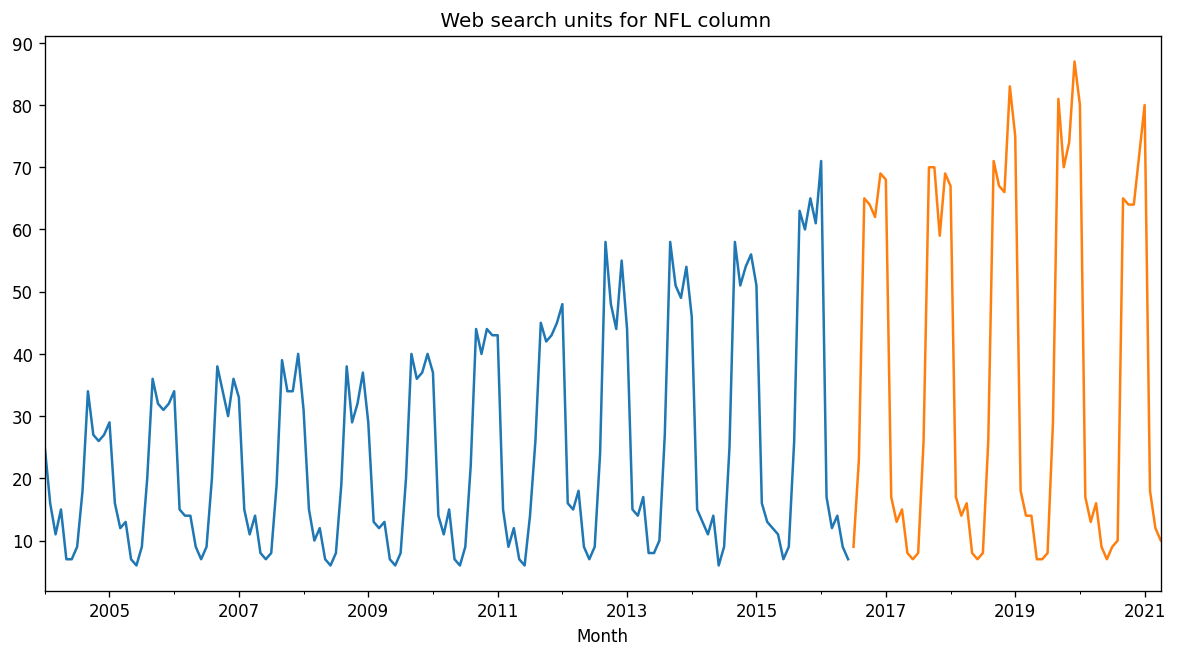

In [ ]:
train.NFL.plot(title=" Web Search units for NFL column")
test.NFL.plot(title=" Web search units for NFL column")
plt.show()

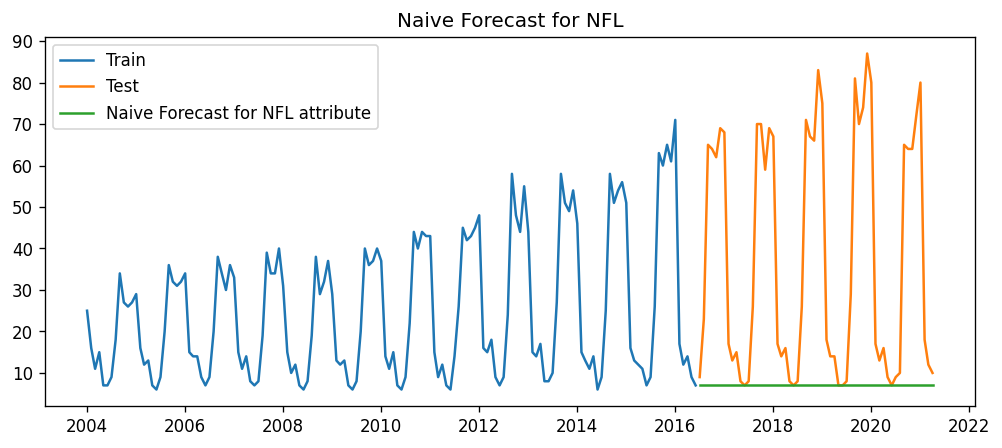

In [ ]:
# NAIVE FORECAST

dd =np.asarray(train.NFL)
y_hat = test.copy()
y_hat['naive']= dd[len(dd)-1]
plt.figure(figsize=(10,4))
plt.plot(train.index,train['NFL'],label='Train')
plt.plot(test.index,test['NFL'],label='Test')
plt.plot(y_hat.index,y_hat['naive'],label='Naive Forecast for NFL attribute')
plt.legend(loc='best')
plt.title("Naive Forecast for NFL")
plt.show()

In [ ]:
## Printing RMSE for naive forecast
from sklearn.metrics import mean_squared_error
from math import sqrt
rms_naive_nfl = sqrt(mean_squared_error(test.NFL, y_hat.naive))
print(rms_naive_nfl)

42.43737779932637


###Simple Average

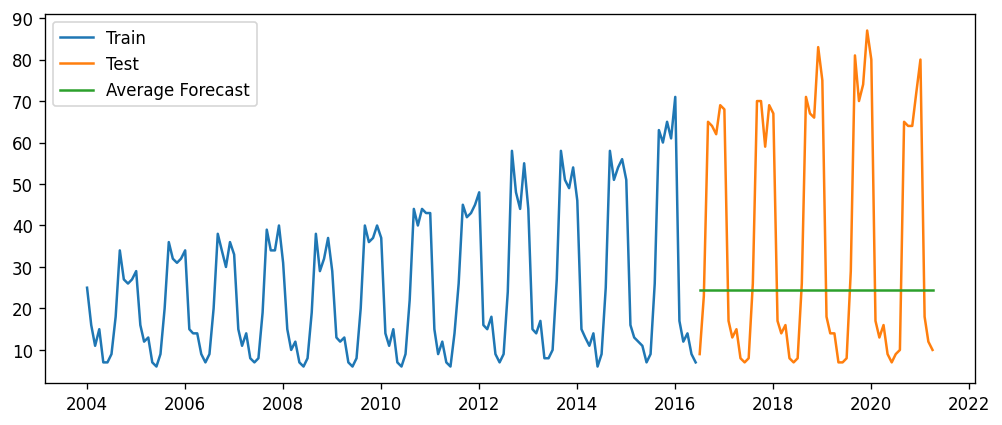

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['NFL'].mean()
plt.figure(figsize=(10,4))
plt.plot(train['NFL'], label='Train')
plt.plot(test['NFL'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
rms_avg_nfl = sqrt(mean_squared_error(test.NFL, y_hat_avg.avg_forecast))
print(rms_avg_nfl)

31.979219521840324


###Trends of NFL

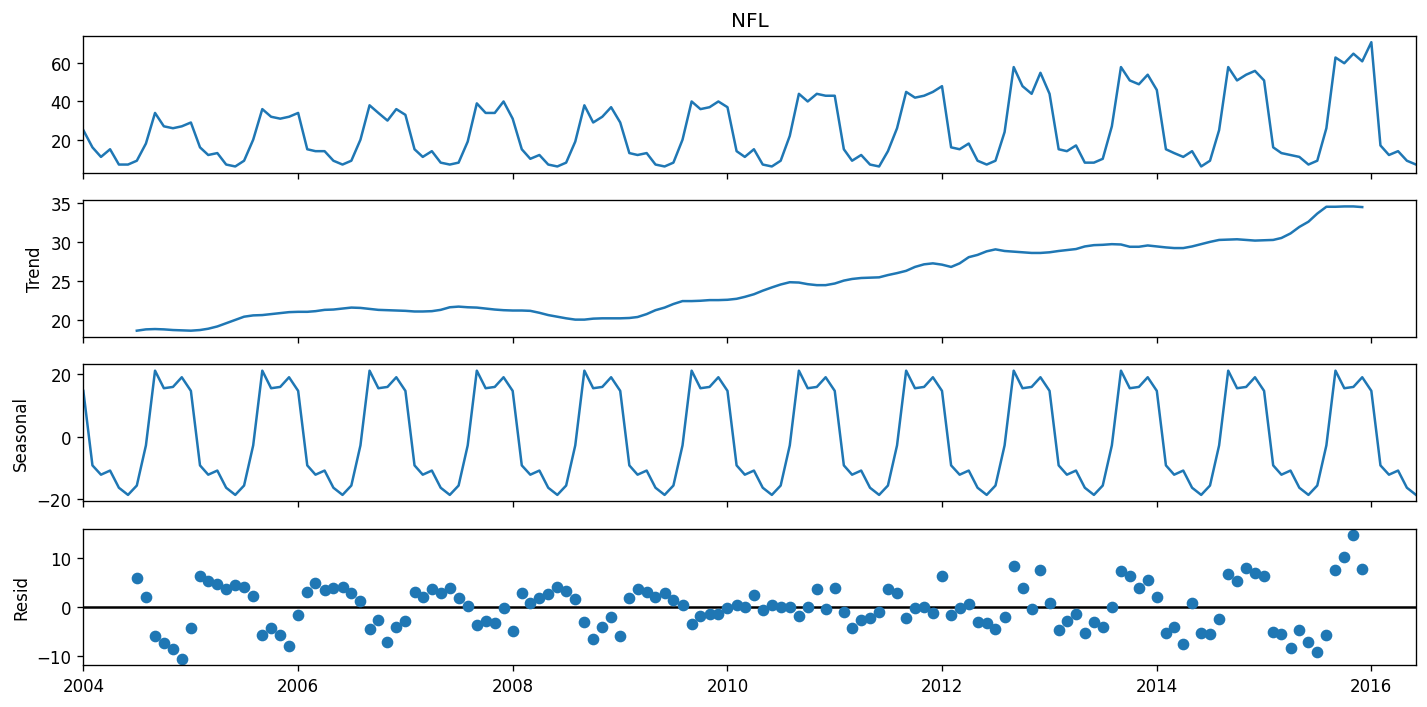

In [ ]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.NFL).plot()
result = sm.tsa.stattools.adfuller(train.NFL)
plt.show()

###Holt's Linear Trend Model

<ipython-input-62-66d4c289d17b>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(np.asarray(train['NFL'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


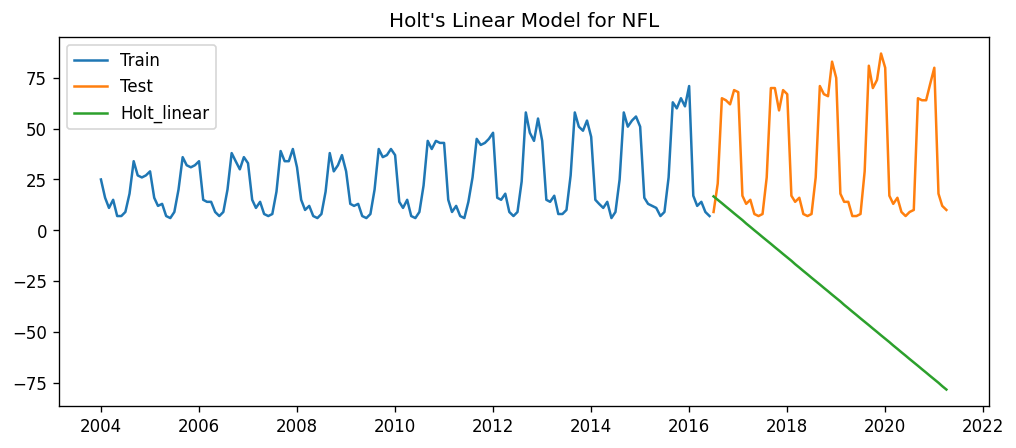

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['NFL'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(10,4))
plt.plot(train['NFL'], label='Train')
plt.plot(test['NFL'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.title("Holt's Linear Model for NFL")
plt.show()

In [ ]:
rms_lin_nfl = sqrt(mean_squared_error(test.NFL, y_hat_avg.Holt_linear))
print(rms_lin_nfl)

79.77351554868468


###Holt's Winter Exponential Method

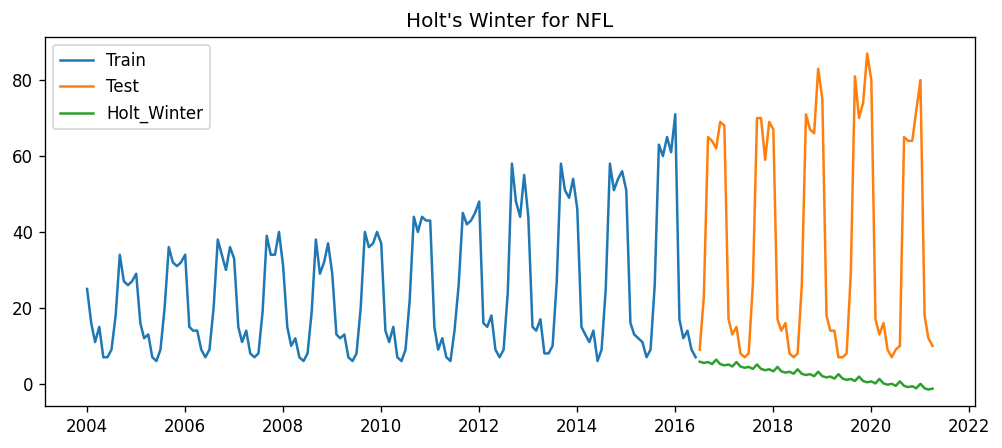

In [ ]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['NFL']) ,seasonal_periods=5 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(10,4))
plt.plot( train['NFL'], label='Train')
plt.plot(test['NFL'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.title("Holt's Winter for NFL")
plt.show()

In [ ]:
rms_exp_nfl = sqrt(mean_squared_error(test.NFL, y_hat_avg.Holt_Winter))
print(rms_exp_nfl)

45.99906620938625


###SARIMA MODEL

<ipython-input-66-55b077cc7857>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_SAR['NFL'] = train_SAR['NFL'].fillna(train_SAR['NFL'].mean())  # Replace NaNs with mean


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=801.508, Time=1.79 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=842.787, Time=0.13 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=810.295, Time=0.66 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=799.339, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=840.795, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=797.459, Time=0.34 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=799.331, Time=1.04 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=801.373, Time=1.98 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=791.117, Time=0.49 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=793.392, Time=0.80 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=793.713, Time=0.73 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=797.401, Time=1.28 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=808.594, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=803.149, Time=0.40 sec
 ARIMA(1,0,2)(0,0,0)[12] intercep

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


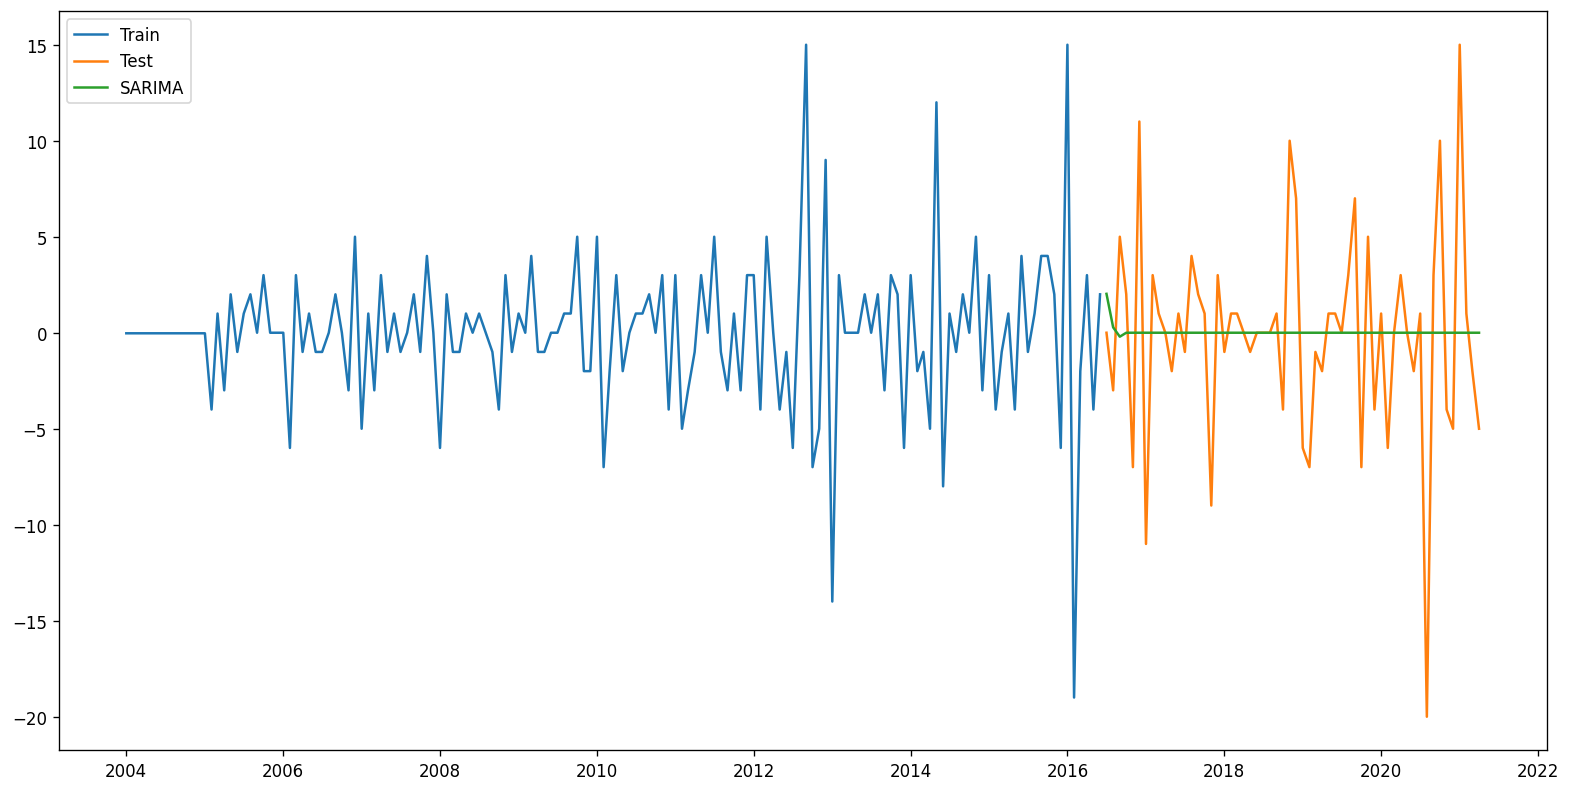

In [ ]:
from pmdarima import auto_arima

# Fit SARIMA model using auto_arima
y_hat_NFL=test_SAR.copy()
train_SAR['NFL'] = train_SAR['NFL'].fillna(train_SAR['NFL'].mean())  # Replace NaNs with mean
auto_model = auto_arima(train_SAR.NFL, seasonal=True, m=12, stepwise=True, trace=True, suppress_warnings=True, error_action="ignore", max_order=None, seasonal_test='ocsb', out_of_sample_size=int(len(train_SAR)*0.2))

# Get the best SARIMA model
best_model = auto_model.get_params()
print("Best SARIMA model:", best_model)

# Fit the best SARIMA model
best_fit = sm.tsa.statespace.SARIMAX(train_SAR.NFL, order=(best_model['order']), seasonal_order=(best_model['seasonal_order'])).fit()

# Generate forecasts
y_hat_NFL['SARIMA'] = best_fit.predict(start="2016-06-1", end="2021-04-1", dynamic=True)

# Plot the results
plt.figure(figsize=(16,8))
plt.plot(train_SAR['NFL'], label='Train')
plt.plot(test_SAR['NFL'], label='Test')
plt.plot(y_hat_NFL['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()


In [ ]:
rms_sari_nfl = sqrt(mean_squared_error(test_SAR.NFL, y_hat_NFL.SARIMA))
print(rms_sari_nfl)

5.461425677058113


In [ ]:
from tabulate import tabulate
from tabulate import tabulate_formats
tbl=tabulate([["Naive Method ",rms_naive_nfl],["SimpleAvg",rms_avg_nfl],["Holts_linear",rms_lin_nfl],
              ["Holts_Exponentiation",rms_exp_nfl],["SARIMA",rms_sari_nfl]],headers=["Method(NFL)","RMSE"],tablefmt="rst")
print(tbl)

====================  ========
Method(NFL)               RMSE
====================  ========
Naive Method          42.4374
SimpleAvg             31.9792
Holts_linear          79.7735
Holts_Exponentiation  45.9991
SARIMA                 5.46143
====================  ========


# Premier League

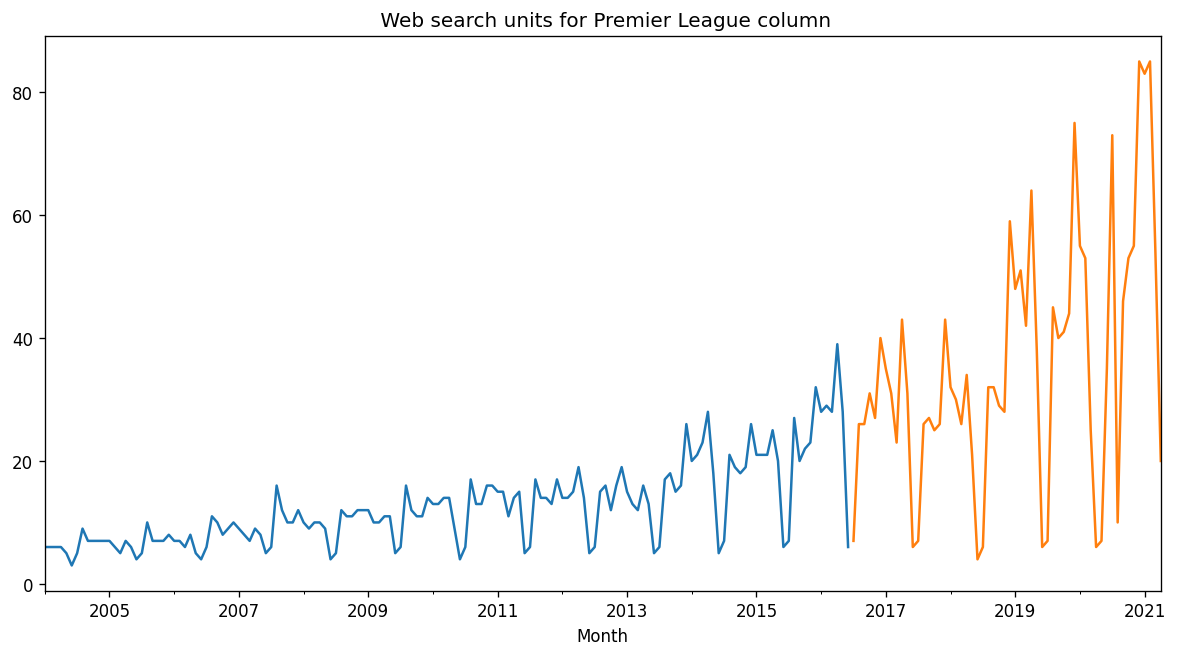

In [ ]:
train['Premier League'].plot(title=" Web Search units for Premier League column")
test['Premier League'].plot(title=" Web search units for Premier League column")
plt.show()

### Naive Forecast

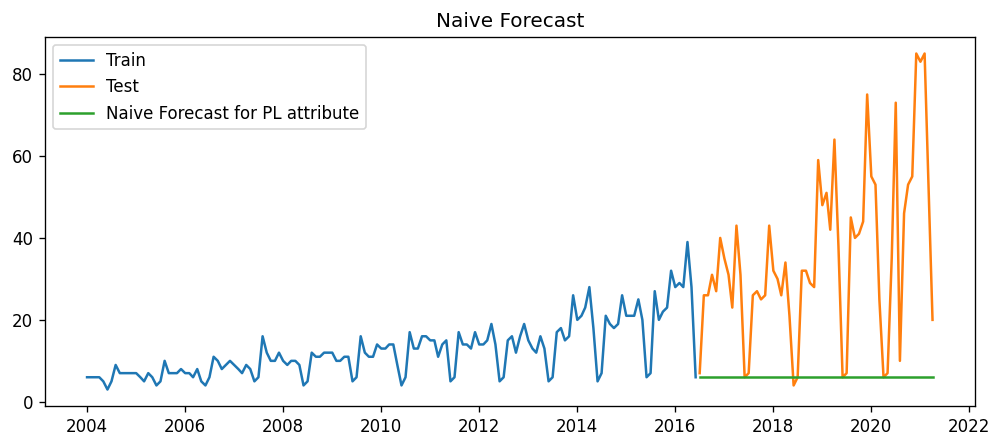

In [ ]:
dd =np.asarray(train['Premier League'])
y_hat = test.copy()
y_hat['naive']= dd[len(dd)-1]
plt.figure(figsize=(10,4))
plt.plot(train.index,train['Premier League'],label='Train')
plt.plot(test.index,test['Premier League'],label='Test')
plt.plot(y_hat.index,y_hat['naive'],label='Naive Forecast for PL attribute')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [ ]:
## Printing RMSE for naive forecast
from sklearn.metrics import mean_squared_error
from math import sqrt
rms_naive = sqrt(mean_squared_error(test['Premier League'], y_hat.naive))
print(rms_naive)

35.86444786539527


### Simple Average
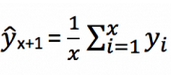

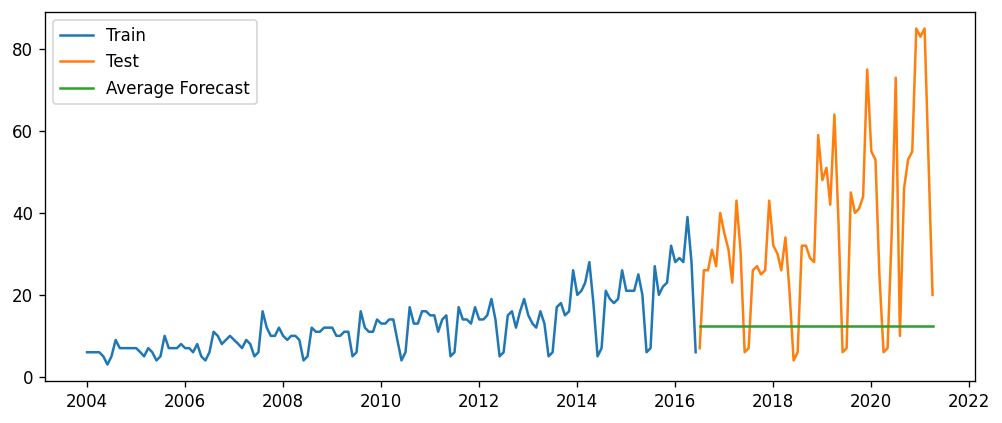

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Premier League'].mean()
plt.figure(figsize=(10,4))
plt.plot(train['Premier League'], label='Train')
plt.plot(test['Premier League'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
rms_avg = sqrt(mean_squared_error(test['Premier League'], y_hat_avg.avg_forecast))
print(rms_avg)

30.77093142382361


### Trends of Premier league

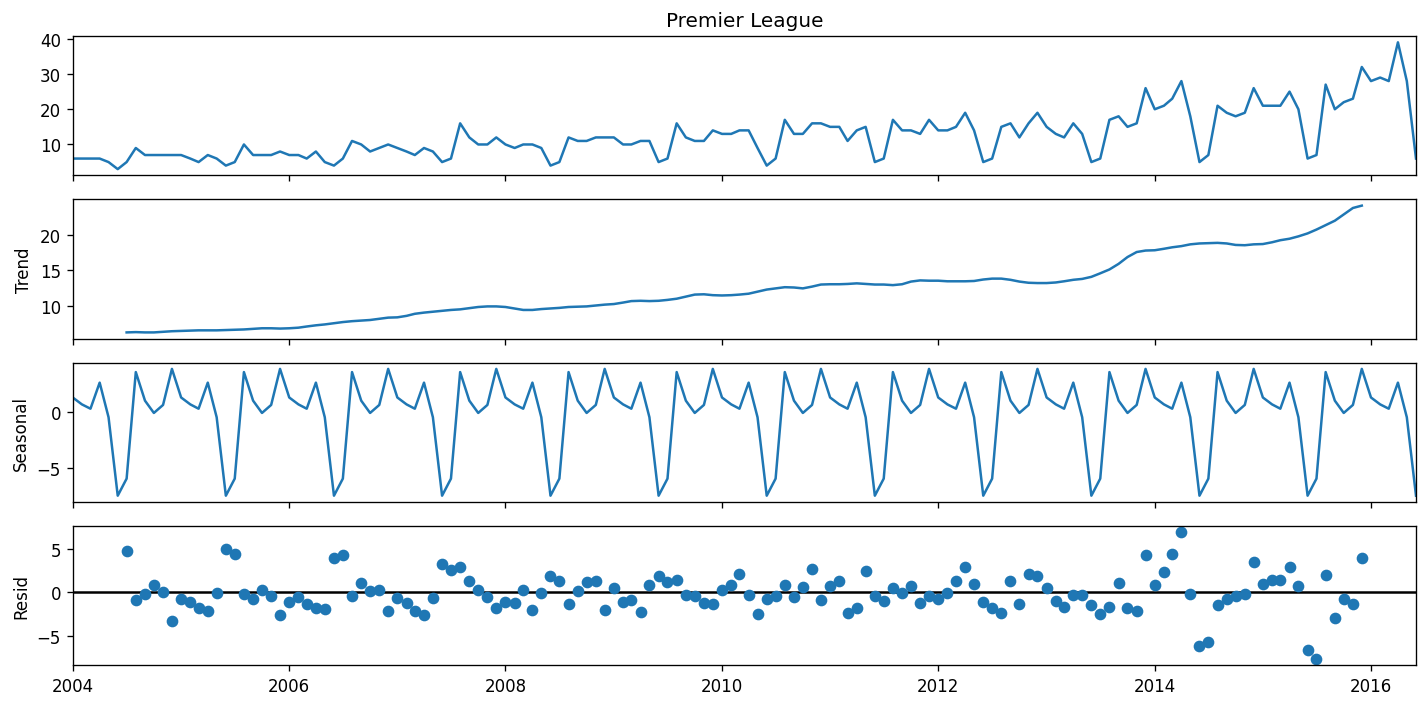

In [ ]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train['Premier League']).plot()
result = sm.tsa.stattools.adfuller(train['Premier League'])
plt.show()

### Holt's Linear Trend Model



<ipython-input-75-23cf8dbbbb81>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(np.asarray(train['Premier League'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


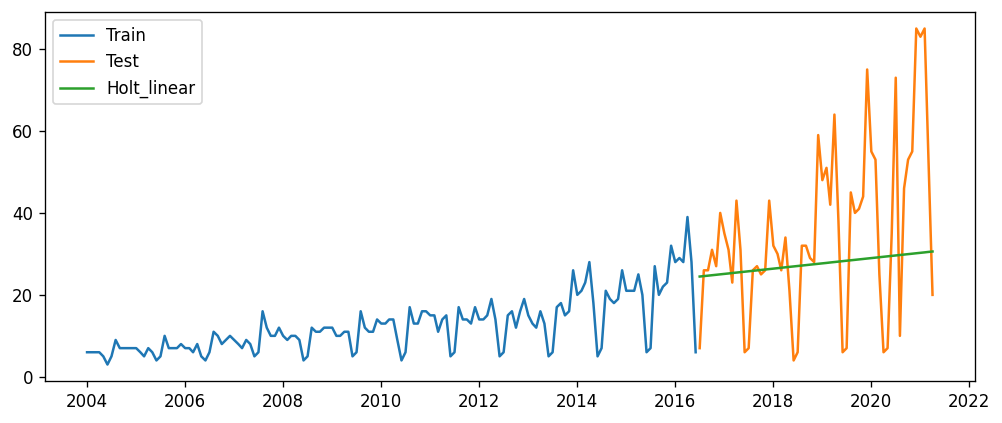

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Premier League'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(10,4))
plt.plot(train['Premier League'], label='Train')
plt.plot(test['Premier League'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()



In [ ]:
rms_lin = sqrt(mean_squared_error(test['Premier League'], y_hat_avg.Holt_linear))
print(rms_lin)

21.205875371798985


### Holt-Winters Exponential Model

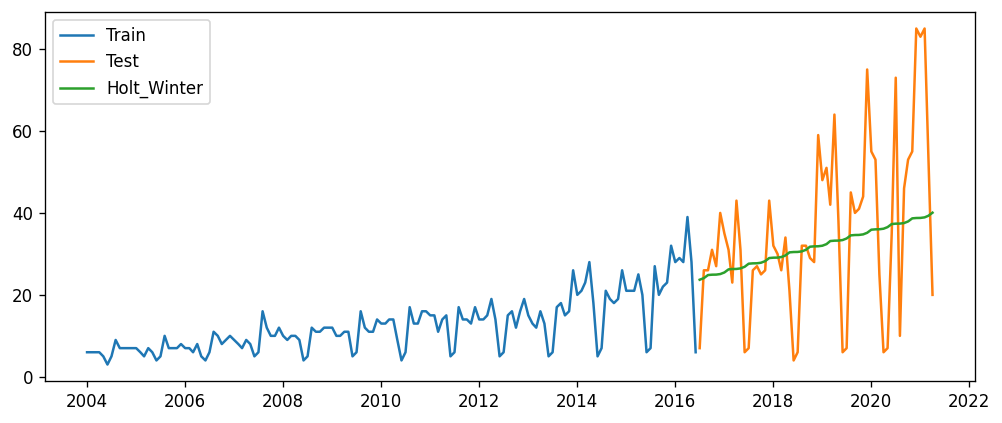

In [ ]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Premier League']) ,seasonal_periods=5 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(10,4))
plt.plot( train['Premier League'], label='Train')
plt.plot(test['Premier League'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [ ]:
rms_exp = sqrt(mean_squared_error(test['Premier League'], y_hat_avg.Holt_Winter))
print(rms_exp)

19.11077364065957


### SARIMA MODEL

<ipython-input-81-961df42df6c1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_SAR['Premier League'] = train_SAR['Premier League'].fillna(train_SAR['Premier League'].mean())  # Replace NaNs with mean


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.35 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=703.201, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=659.423, Time=0.22 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=701.203, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=694.317, Time=0.10 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=646.414, Time=1.05 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=649.502, Time=1.81 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=647.341, Time=0.31 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=664.422, Time=0.40 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=631.531, Time=0.77 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=645.921, Time=0.30 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=635.268, Time=1.03 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=632.266, Time=0.40 sec
 ARIMA(3,0,0)(2,0,0)[12] intercept   : AI

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


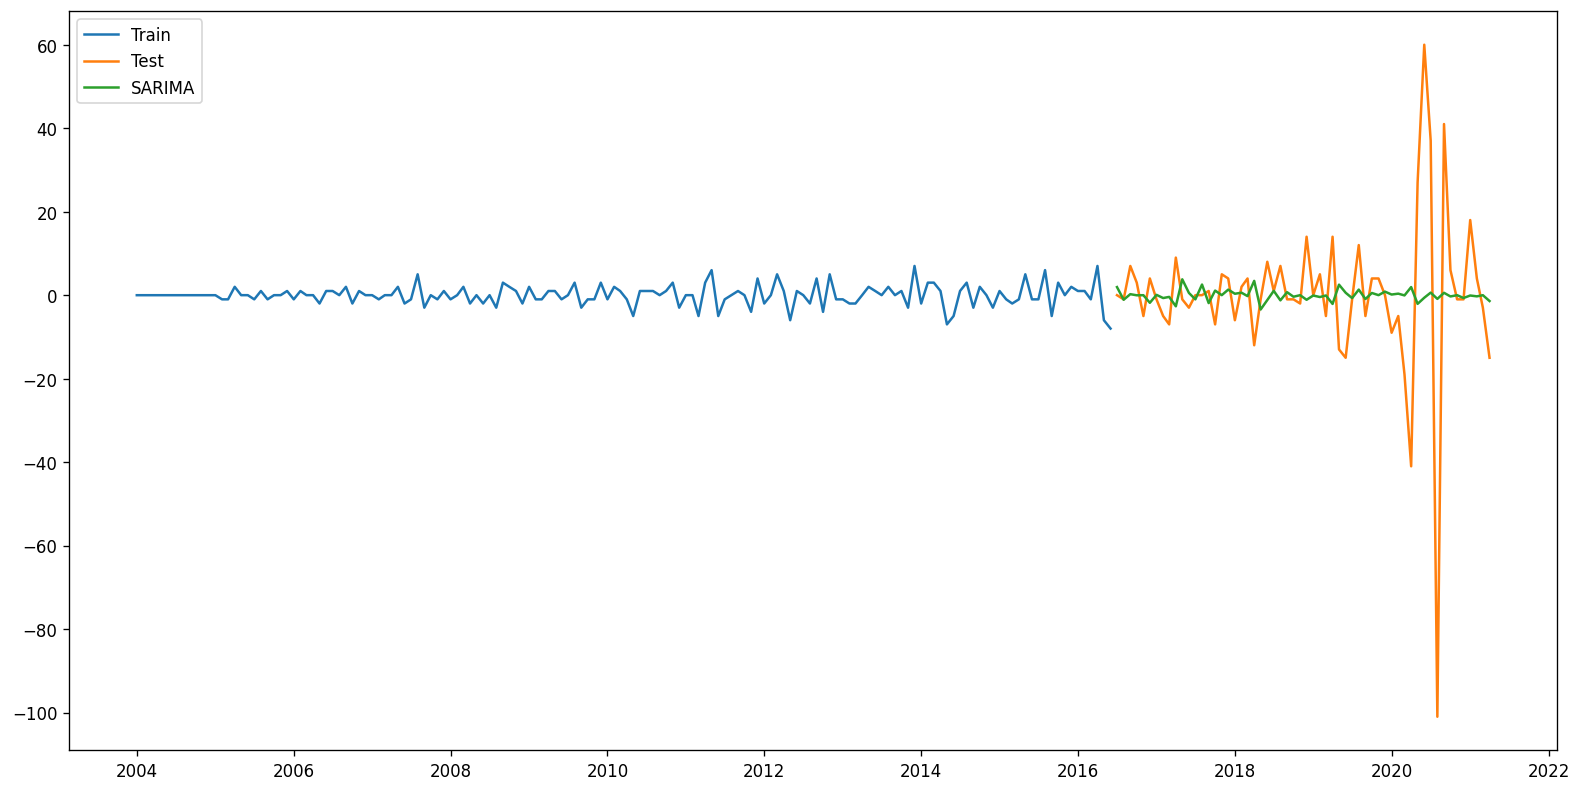

In [ ]:
from pmdarima import auto_arima

# Fit SARIMA model using auto_arima
y_hat_Premier=test_SAR.copy()
train_SAR['Premier League'] = train_SAR['Premier League'].fillna(train_SAR['Premier League'].mean())  # Replace NaNs with mean
auto_model = auto_arima(train_SAR['Premier League'], seasonal=True, m=12, stepwise=True, trace=True, suppress_warnings=True, error_action="ignore", max_order=None, seasonal_test='ocsb', out_of_sample_size=int(len(train_SAR)*0.2))

# Get the best SARIMA model
best_model = auto_model.get_params()
print("Best SARIMA model:", best_model)

# Fit the best SARIMA model
best_fit = sm.tsa.statespace.SARIMAX(train_SAR['Premier League'], order=(best_model['order']), seasonal_order=(best_model['seasonal_order'])).fit()

# Generate forecasts
y_hat_Premier['SARIMA'] = best_fit.predict(start="2016-06-1", end="2021-04-1", dynamic=True)

# Plot the results
plt.figure(figsize=(16,8))
plt.plot(train_SAR['Premier League'], label='Train')
plt.plot(test_SAR['Premier League'], label='Test')
plt.plot(y_hat_Premier['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()


In [ ]:
rms_sari = sqrt(mean_squared_error(test_SAR['Premier League'], y_hat_Premier.SARIMA))
print(rms_sari)

19.69990759647502


In [ ]:
from tabulate import tabulate
from tabulate import tabulate_formats
tbl=tabulate([["Naive Method ",rms_naive],["SimpleAvg",rms_avg],["Holts_linear",rms_lin],["Holts_Exponentiation",rms_exp],["SARIMA",rms_sari]],headers=["Method","RMSE"],tablefmt="rst")
print(tbl)

====================  =======
Method                   RMSE
====================  =======
Naive Method          35.8644
SimpleAvg             30.7709
Holts_linear          21.2059
Holts_Exponentiation  19.1108
SARIMA                19.6999
====================  =======
